# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

## ⚠️ DISCLAIMER ⚠️
**This notebook was AI-generated and has not been fully verified. Exercise caution when interpreting the code or results.**

## Overview
This Dandiset contains extracellular electrophysiology recordings from mice using Neuropixels probes, focusing on how visual responses evolve from the thalamus, through the primary visual cortex, higher order visual areas, and the hippocampus. The project aims to understand how abstract concepts are processed in the hippocampus compared to more direct sensory responses in earlier visual regions.

The experiments present various visual stimuli to mice, including:
1. Simple visual motion (bars of light with different parameters)
2. Complex, potentially ethologically relevant visual stimuli (movies of eagles and squirrels)

Dandiset URL: [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

## Required Packages
The following packages are needed to run this notebook. If you don't have them installed, you'll need to install them first.

In [1]:
# Core data handling and scientific computing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# DANDI-specific packages
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# NWB file handling
import pynwb
import h5py
import remfile

# Set some plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_theme()

## Accessing the Dandiset
First, we'll connect to the DANDI archive and access the Dandiset using the API.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:300]}...")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such...

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading and Exploring an NWB File

Let's load one of the main session NWB files to explore its content. We'll use the main session file with ID `fbcd4fe5-7107-41b2-b154-b67f783f23dc` which contains session-wide information.

In [3]:
# Define the asset URL for the NWB file we want to load
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)

# Load the NWB file
nwb = io.read()

# Display basic metadata
print(f"Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"File Creation Date: {nwb.file_create_date[0]}")

# Display subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age} ({nwb.subject.age_in_days} days)")
print(f"Sex: {nwb.subject.sex}")
print(f"Species: {nwb.subject.species}")
print(f"Strain: {nwb.subject.strain}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1298465622
Session Description: Data and metadata for an Ecephys session
Session Start Time: 2023-09-21 00:00:00-07:00
Institution: Allen Institute
File Creation Date: 2025-02-25 16:36:10.235851-08:00

Subject Information:
Subject ID: 692072
Age: P82D (82.0 days)
Sex: M
Species: Mus musculus
Strain: Transgenic


### NWB File Structure

The NWB file contains several main components:

#### 1. Acquisition Data
- Eye tracking data (corneal reflection, pupil tracking)
- Running wheel rotation data
- Running wheel voltage measurements

#### 2. Processing Modules
- Running speed data
- Stimulus timing information

#### 3. Electrode and Probe Information
- Multiple Neuropixels probes with electrode location data
- LFP (Local Field Potential) data

#### 4. Stimulus Presentations
- Detailed timing information for various stimuli types
- Includes simpler stimuli (bars of light) and natural movie stimuli

#### 5. Units (Neurons) Data
- Spike times
- Neuron quality metrics
- Waveform data

In [4]:
# Let's explore the acquisition data
print("Acquisition data keys:")
acq_keys = list(nwb.acquisition.keys())
print(acq_keys)

# Look at the stimulus intervals
print("\nStimulus presentation intervals:")
intervals_keys = list(nwb.intervals.keys())
# Just print a subset to avoid too much output
print(intervals_keys[:5])

# Check the units (neurons recorded)
print(f"\nNumber of recorded units: {len(nwb.units.id[:])}")

Acquisition data keys:
['EyeTracking', 'raw_running_wheel_rotation', 'running_wheel_signal_voltage', 'running_wheel_supply_voltage']

Stimulus presentation intervals:
['Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations']

Number of recorded units: 2764


## Exploring the Eye Tracking Data

Let's examine the eye tracking data to understand how the mouse's eye movements were recorded during the experiment.

Eye tracking components: ['corneal_reflection_tracking', 'eye_tracking', 'pupil_tracking']


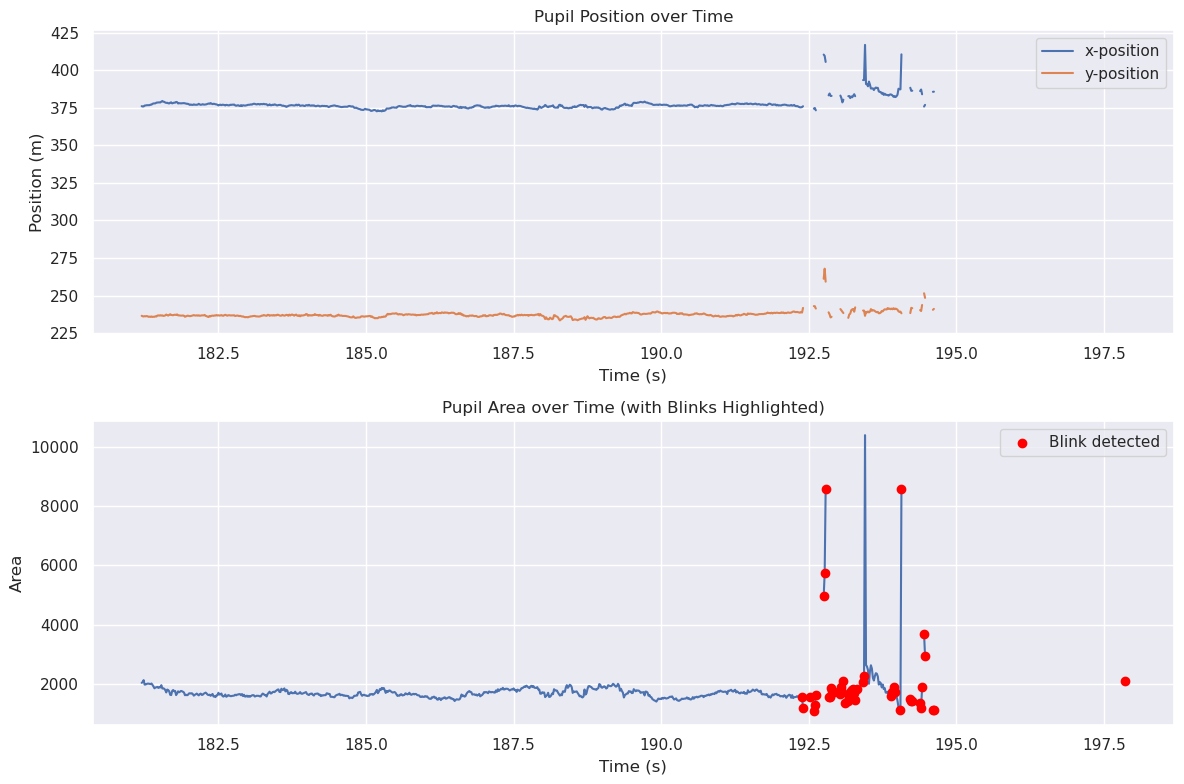

In [5]:
# Get eye tracking data
eye_tracking = nwb.acquisition['EyeTracking']

# Look at the spatial series keys
print("Eye tracking components:", list(eye_tracking.spatial_series.keys()))

# Extract pupil tracking data
pupil_data = eye_tracking.pupil_tracking.data[:]
pupil_timestamps = eye_tracking.pupil_tracking.timestamps[:]
blink_data = eye_tracking.likely_blink.data[:]

# Plot a segment of the pupil data
sample_size = 1000
sample_start = 10000  # Start after some initial frames
plt.figure(figsize=(12, 8))

# Plot x and y coordinates of pupil position
plt.subplot(211)
plt.plot(pupil_timestamps[sample_start:sample_start+sample_size], 
         pupil_data[sample_start:sample_start+sample_size, 0], 
         label='x-position')
plt.plot(pupil_timestamps[sample_start:sample_start+sample_size], 
         pupil_data[sample_start:sample_start+sample_size, 1], 
         label='y-position')
plt.title('Pupil Position over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(True)

# Plot pupil area (a proxy for dilation)
plt.subplot(212)
plt.plot(pupil_timestamps[sample_start:sample_start+sample_size], 
         eye_tracking.pupil_tracking.area[sample_start:sample_start+sample_size])
# Highlight blinks
blink_indices = np.where(blink_data[sample_start:sample_start+sample_size])[0]
if len(blink_indices) > 0:
    blink_times = pupil_timestamps[sample_start + blink_indices]
    blink_areas = eye_tracking.pupil_tracking.area[sample_start + blink_indices]
    plt.scatter(blink_times, blink_areas, color='red', label='Blink detected', zorder=5)
    
plt.title('Pupil Area over Time (with Blinks Highlighted)')
plt.xlabel('Time (s)')
plt.ylabel('Area')
plt.legend()
plt.grid(True)

plt.tight_layout()

## Exploring Running Speed Data

The mouse's running behavior is an important contextual variable in neuroscience experiments. Let's examine the running speed data.

Mean running speed: 0.99 cm/s
Maximum running speed: 68.58 cm/s
Time spent running (>5 cm/s): 7.72%


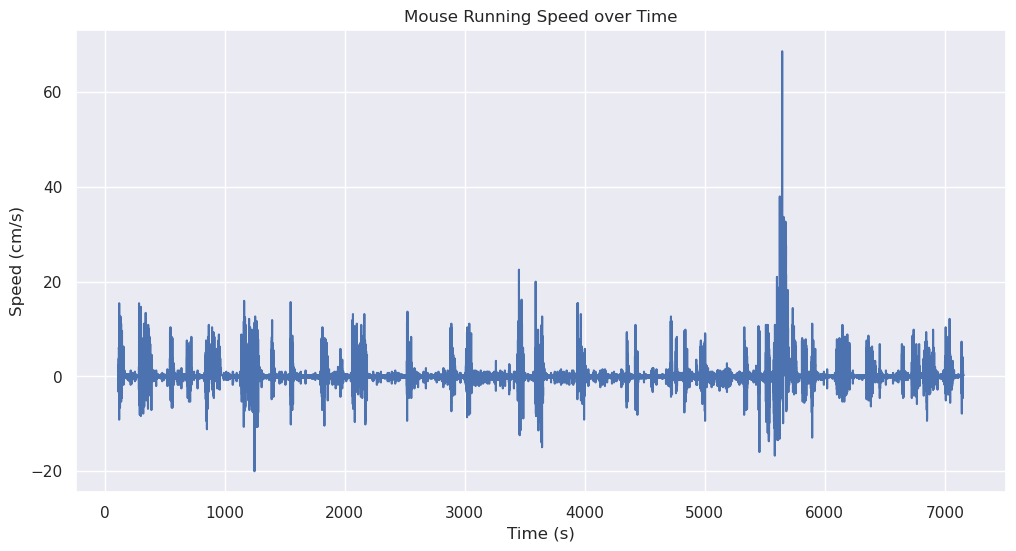

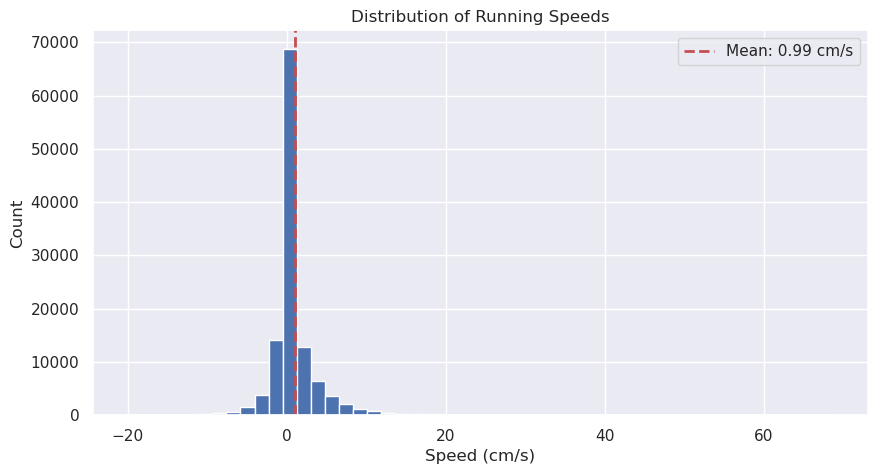

In [6]:
# Get running speed data from processing module
running_module = nwb.processing['running']
running_speed = running_module.data_interfaces['running_speed']

# Extract data and timestamps
speed_data = running_speed.data[:]
speed_timestamps = running_speed.timestamps[:]

# Plot running speed over time
plt.figure(figsize=(12, 6))
plt.plot(speed_timestamps, speed_data)
plt.title('Mouse Running Speed over Time')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.grid(True)

# Compute some basic statistics
mean_speed = np.mean(speed_data)
max_speed = np.max(speed_data)
speed_above_threshold = np.sum(speed_data > 5.0) / len(speed_data) * 100  # % of time running above 5 cm/s

print(f"Mean running speed: {mean_speed:.2f} cm/s")
print(f"Maximum running speed: {max_speed:.2f} cm/s")
print(f"Time spent running (>5 cm/s): {speed_above_threshold:.2f}%")

# Plot histogram of running speeds
plt.figure(figsize=(10, 5))
plt.hist(speed_data, bins=50)
plt.title('Distribution of Running Speeds')
plt.xlabel('Speed (cm/s)')
plt.ylabel('Count')
plt.grid(True)
plt.axvline(mean_speed, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_speed:.2f} cm/s')
plt.legend()

## Exploring Stimulus Presentations

The experiment presented various visual stimuli to the mouse. Let's look at the timing and properties of these stimulus presentations.

First few SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations presentations:
    start_time   stop_time                     stimulus_name
id                                                          
0   113.102930  113.119610  SAC_Wd15_Vel2_Bndry1_Cntst0_loop
1   113.119610  113.136289  SAC_Wd15_Vel2_Bndry1_Cntst0_loop
2   113.136289  113.152969  SAC_Wd15_Vel2_Bndry1_Cntst0_loop
3   113.152969  113.169648  SAC_Wd15_Vel2_Bndry1_Cntst0_loop
4   113.169648  113.186328  SAC_Wd15_Vel2_Bndry1_Cntst0_loop



Information about natmovie_EagleSwooping1_540x960Full_584x460Active_presentations:
Total presentations: 14400
First presentation time: 5235.47 s
Last presentation time: 5475.68 s
Total movie presentation duration: 240.20 s


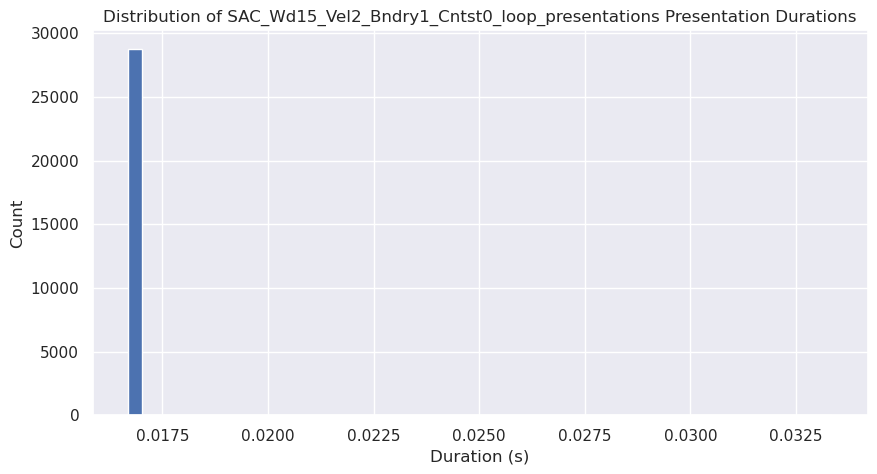

In [7]:
# Select one of the stimulus presentation intervals
stim_key = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'  # Standard white bar stimulus
stimulus_intervals = nwb.intervals[stim_key]

# Convert to a pandas DataFrame for easier analysis
stim_df = stimulus_intervals.to_dataframe()

# Look at the first few stimulus presentations
print(f"First few {stim_key} presentations:")
print(stim_df[['start_time', 'stop_time', 'stimulus_name']].head())

# Calculate presentation durations
stim_df['duration'] = stim_df['stop_time'] - stim_df['start_time']

# Plot histogram of stimulus durations
plt.figure(figsize=(10, 5))
plt.hist(stim_df['duration'], bins=50)
plt.title(f'Distribution of {stim_key} Presentation Durations')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.grid(True)

# Now look at natural movie presentations
movie_key = 'natmovie_EagleSwooping1_540x960Full_584x460Active_presentations'
if movie_key in nwb.intervals:
    movie_intervals = nwb.intervals[movie_key]
    movie_df = movie_intervals.to_dataframe()
    
    # Display information about the movie presentations
    print(f"\nInformation about {movie_key}:")
    print(f"Total presentations: {len(movie_df)}")
    print(f"First presentation time: {movie_df['start_time'].min():.2f} s")
    print(f"Last presentation time: {movie_df['stop_time'].max():.2f} s")
    
    # Calculate total duration of movie presentations
    movie_durations = movie_df['stop_time'] - movie_df['start_time']
    total_movie_duration = movie_durations.sum()
    print(f"Total movie presentation duration: {total_movie_duration:.2f} s")
else:
    print(f"\n{movie_key} not found in this NWB file")

## Loading and Exploring LFP Data from a Probe

Now, let's load data from a probe-specific NWB file which contains the Local Field Potential (LFP) data. LFP signals reflect the summed synaptic activity in the vicinity of the recording electrodes and provide information about the oscillatory dynamics in different brain regions.

In [8]:
# Let's load the LFP data from one of the probe files
probe_url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
probe_remote_file = remfile.File(probe_url)
probe_h5_file = h5py.File(probe_remote_file)
probe_io = pynwb.NWBHDF5IO(file=probe_h5_file)

# Load the NWB file
probe_nwb = probe_io.read()

# Print basic information
print(f"Probe NWB file session ID: {probe_nwb.session_id}")
print(f"Probe NWB file description: {probe_nwb.session_description}")

# Check the electrode groups
print("\nElectrode groups:")
for group_name, group in probe_nwb.electrode_groups.items():
    print(f"- {group_name}: {group.description}, located at {group.location}")
    print(f"  LFP sampling rate: {group.lfp_sampling_rate} Hz")
    print(f"  Raw sampling rate: {group.device.sampling_rate} Hz")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Probe NWB file session ID: 1298465622
Probe NWB file description: LFP data and associated info for one probe

Electrode groups:
- probeA: Ecephys Electrode Group, located at See electrode locations
  LFP sampling rate: 625.0 Hz
  Raw sampling rate: 30000.0 Hz


### Visualizing LFP Data

Let's visualize a small segment of the LFP data from a few channels to get a sense of the neural activity recorded.

Number of LFP channels: 95
LFP sampling rate: 625.0 Hz
LFP data duration: 16187.35 seconds


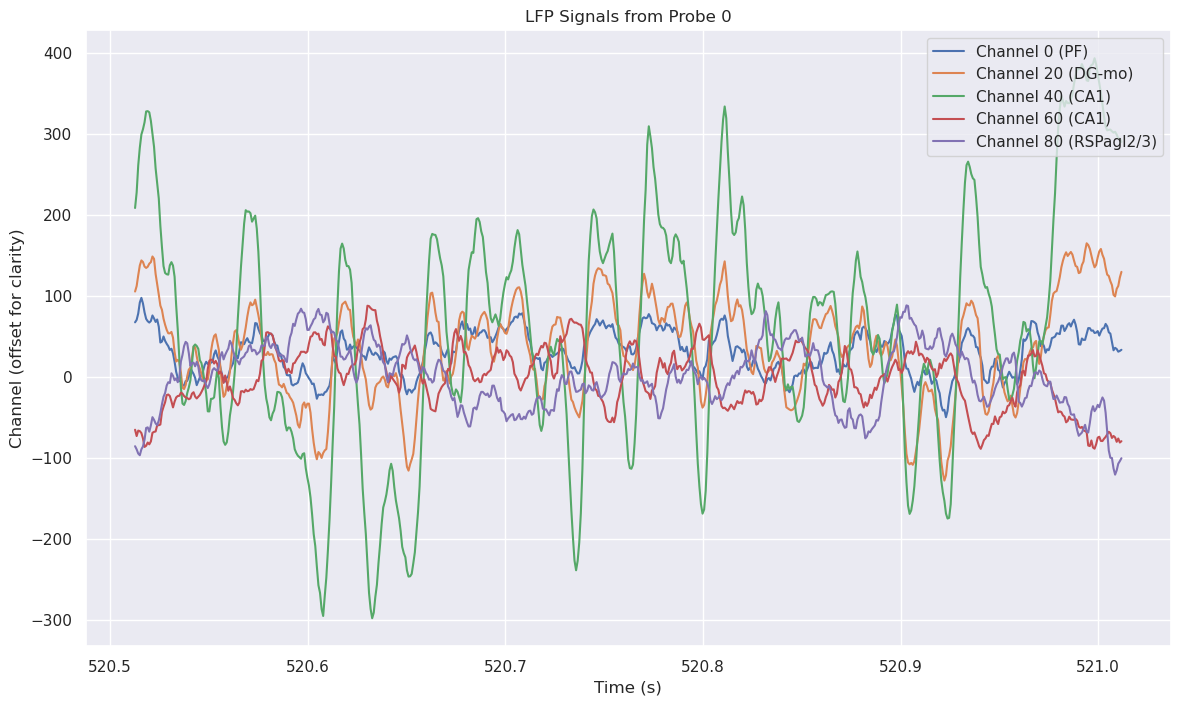

In [9]:
# Access the LFP data
lfp = probe_nwb.acquisition['probe_0_lfp_data']

# Get information about the LFP data
num_channels = lfp.data.shape[1]
sampling_rate = probe_nwb.electrode_groups['probeA'].lfp_sampling_rate
print(f"Number of LFP channels: {num_channels}")
print(f"LFP sampling rate: {sampling_rate} Hz")
print(f"LFP data duration: {lfp.data.shape[0] / sampling_rate:.2f} seconds")

# Due to the size of the data, let's extract a small segment (1 second) from a few channels
start_time = 1000  # seconds
segment_duration = 1  # seconds
start_idx = int(start_time * sampling_rate)
end_idx = start_idx + int(segment_duration * sampling_rate)

# Select a few channels to display
channels_to_display = [0, 20, 40, 60, 80]
lfp_segment = lfp.data[start_idx:end_idx, channels_to_display]
time_segment = lfp.timestamps[start_idx:end_idx]

# Check the electrode locations for the selected channels
electrodes_table = lfp.electrodes.table
electrode_locations = []
for ch in channels_to_display:
    electrode_index = lfp.electrodes.data[ch]
    location = electrodes_table['location'][electrode_index]
    electrode_locations.append(location)

# Plot the LFP data
plt.figure(figsize=(14, 8))
for i, ch in enumerate(channels_to_display):
    # Scale and offset the signal for visualization
    plt.plot(time_segment, lfp_segment[:, i] * 0.5e6 + i*0.5, 
             label=f"Channel {ch} ({electrode_locations[i]})")

plt.title('LFP Signals from Probe 0')
plt.xlabel('Time (s)')
plt.ylabel('Channel (offset for clarity)')
plt.legend(loc='upper right')
plt.grid(True)

### LFP Spectrogram Analysis

Let's compute and visualize a spectrogram of the LFP data to examine the frequency dynamics.

(0.0, 100.0)

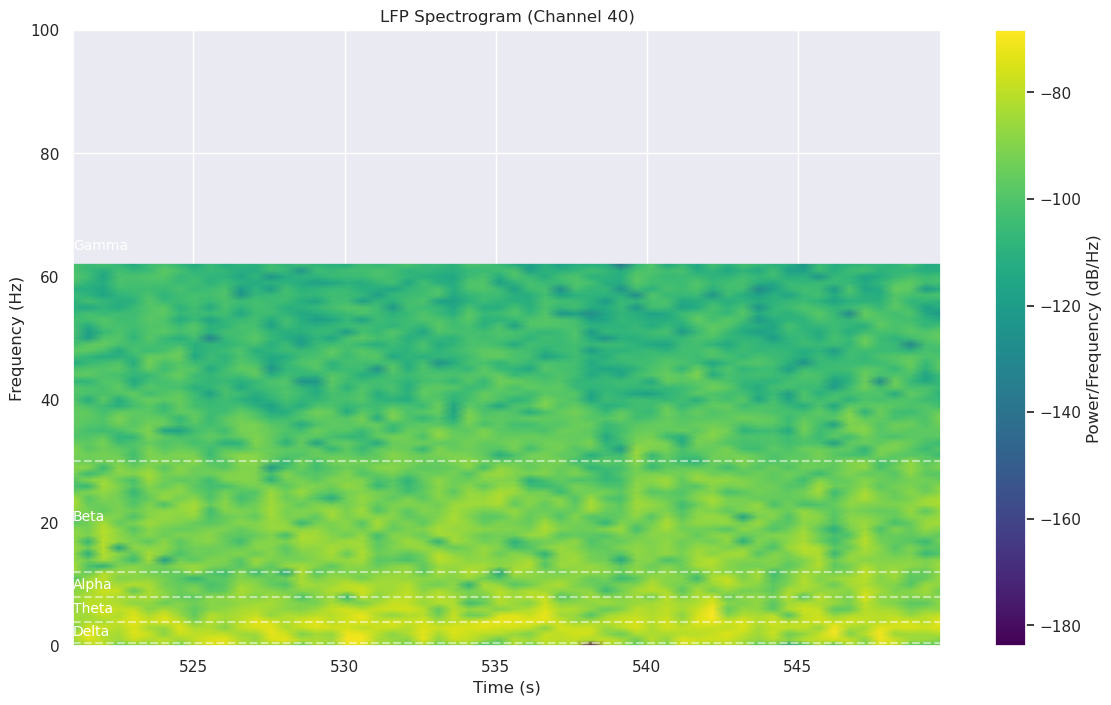

In [10]:
from scipy import signal

# Choose one channel for the spectrogram
channel_idx = 40
selected_channel = lfp.data[:, channel_idx]

# Due to the large size, let's downsample and take just 30 seconds of data
downsample_factor = 5
segment_duration = 30  # seconds
start_idx = int(1000 * sampling_rate)  # Start at 1000 seconds
end_idx = start_idx + int(segment_duration * sampling_rate)

# Downsample the data
lfp_downsampled = selected_channel[start_idx:end_idx:downsample_factor]
time_downsampled = lfp.timestamps[start_idx:end_idx:downsample_factor]
downsampled_fs = sampling_rate / downsample_factor

# Compute the spectrogram
f, t, Sxx = signal.spectrogram(lfp_downsampled, fs=downsampled_fs, window='hann',
                              nperseg=int(downsampled_fs), noverlap=int(downsampled_fs*0.5),
                              detrend='constant', scaling='density')

# Plot the spectrogram
plt.figure(figsize=(14, 8))

# Only show frequencies up to 100 Hz
freq_mask = f <= 100
plt.pcolormesh(t + time_downsampled[0], f[freq_mask], 10 * np.log10(Sxx[freq_mask, :]), 
               shading='gouraud', cmap='viridis')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'LFP Spectrogram (Channel {channel_idx})')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

# Mark frequency bands
freq_bands = [(0.5, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'), 
              (12, 30, 'Beta'), (30, 100, 'Gamma')]
for low, high, name in freq_bands:
    plt.axhline(low, color='w', linestyle='--', alpha=0.5)
    plt.text(t[0] + time_downsampled[0], low + (high-low)/2, name, 
             color='w', fontsize=10, va='center')

plt.ylim(0, 100)

## Exploring Neural Spiking Activity

Let's look at the spiking activity of neurons (units) recorded during the experiment. First, we'll examine the distribution of firing rates and other quality metrics.

Number of units: 2764
Mean firing rate: 3.67 Hz
Median firing rate: 1.91 Hz
Min firing rate: 0.00 Hz
Max firing rate: 137.74 Hz


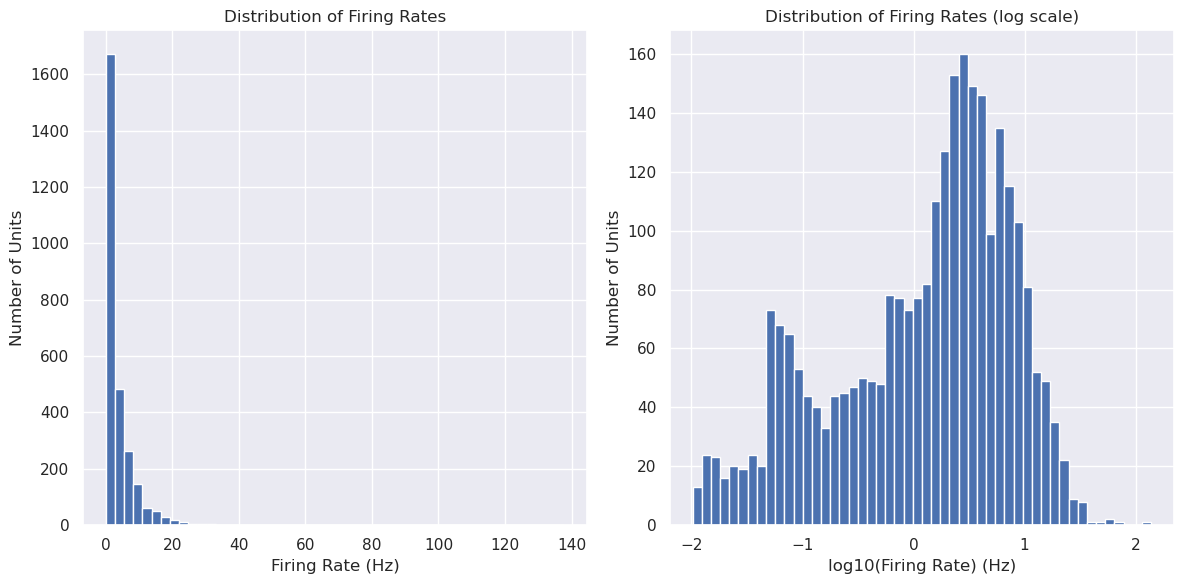

In [11]:
# Get the units data from the main NWB file
units = nwb.units

# Convert to a DataFrame for easier analysis
units_df = units.to_dataframe()

# Basic statistics on firing rates
print(f"Number of units: {len(units_df)}")
print(f"Mean firing rate: {units_df['firing_rate'].mean():.2f} Hz")
print(f"Median firing rate: {units_df['firing_rate'].median():.2f} Hz")
print(f"Min firing rate: {units_df['firing_rate'].min():.2f} Hz")
print(f"Max firing rate: {units_df['firing_rate'].max():.2f} Hz")

# Plot histogram of firing rates
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(units_df['firing_rate'], bins=50)
plt.title('Distribution of Firing Rates')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Number of Units')
plt.grid(True)

# Log scale version for better visualization
plt.subplot(122)
plt.hist(np.log10(units_df['firing_rate'] + 0.01), bins=50)
plt.title('Distribution of Firing Rates (log scale)')
plt.xlabel('log10(Firing Rate) (Hz)')
plt.ylabel('Number of Units')
plt.grid(True)

plt.tight_layout()

### Neuron Waveform Shapes

The shape of a neuron's action potential waveform can provide information about the cell type (e.g., excitatory vs inhibitory neurons). Let's examine some waveforms.

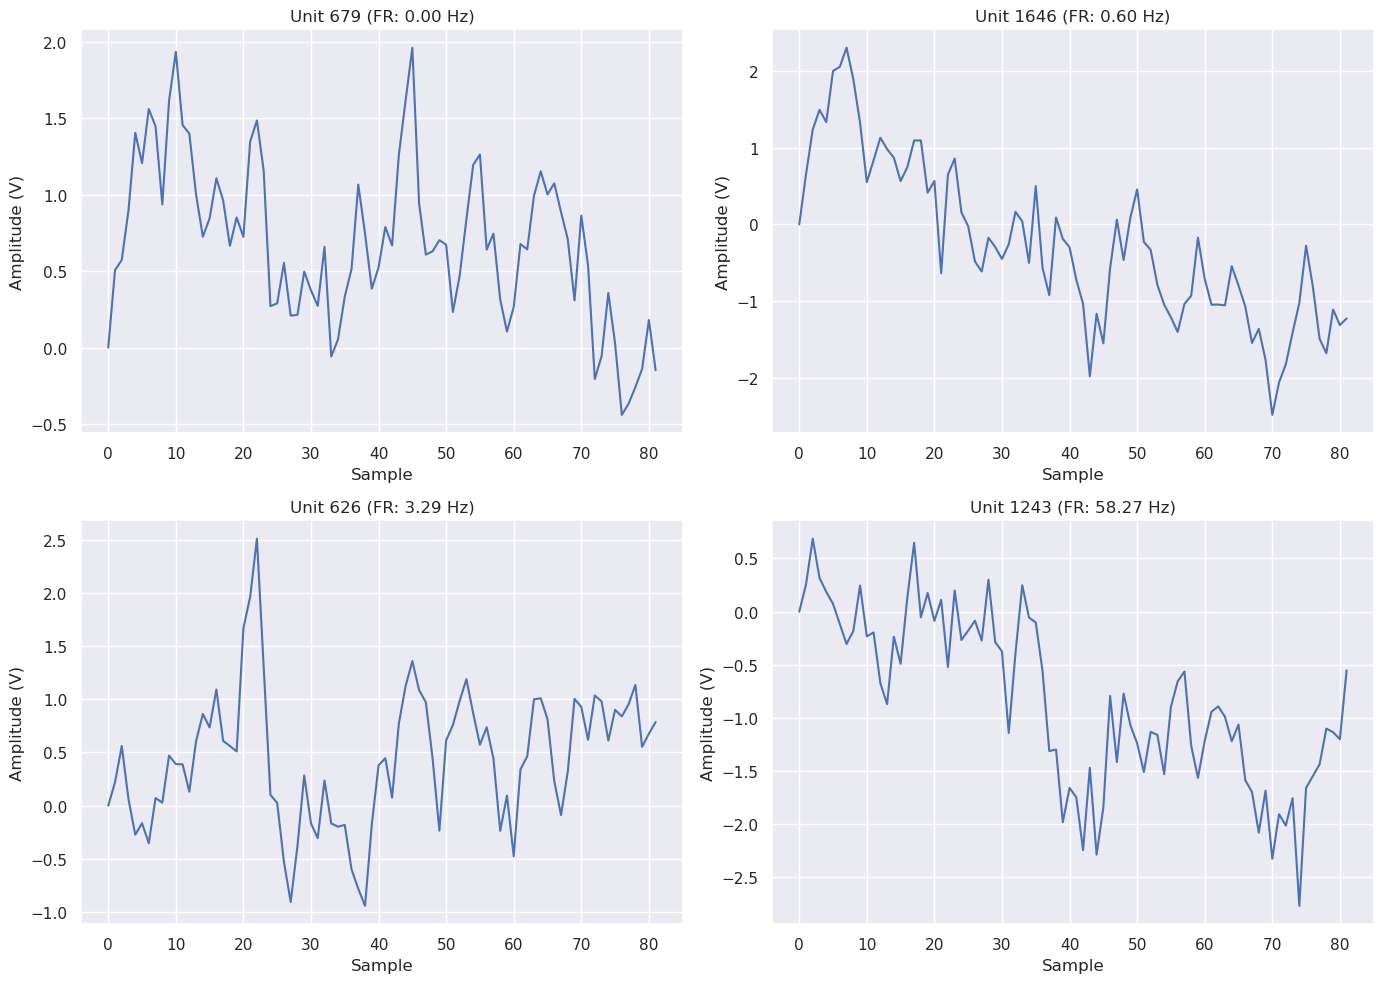

In [12]:
# Extract waveform data for a few example neurons
# Choose units with high SNR and different firing rates
good_units = units_df[(units_df['snr'] > 2) & (units_df['quality'] == 'good')].sort_values('firing_rate').index
example_unit_indices = [good_units[0], good_units[len(good_units)//3], good_units[2*len(good_units)//3], good_units[-1]]

plt.figure(figsize=(14, 10))
for i, unit_idx in enumerate(example_unit_indices):
    # Get the waveform for this unit
    waveform = units.waveform_mean[unit_idx][:]
    
    plt.subplot(2, 2, i+1)
    plt.plot(waveform)
    plt.title(f"Unit {unit_idx} (FR: {units_df.loc[unit_idx, 'firing_rate']:.2f} Hz)")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)

plt.tight_layout()

### Relationship between Firing Rate and Signal Quality

Let's explore the relationship between neuron firing rates and signal quality metrics.

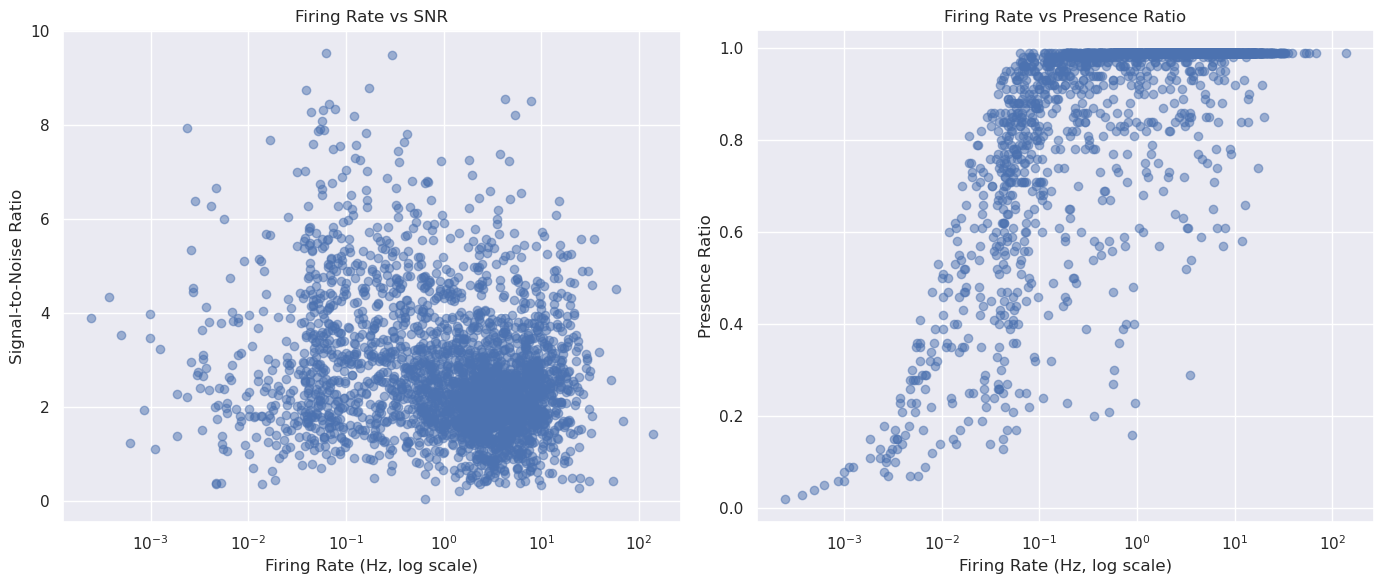

In [13]:
# Create a scatter plot of firing rate vs SNR
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.scatter(units_df['firing_rate'], units_df['snr'], alpha=0.5)
plt.xscale('log')
plt.title('Firing Rate vs SNR')
plt.xlabel('Firing Rate (Hz, log scale)')
plt.ylabel('Signal-to-Noise Ratio')
plt.grid(True)

# Create a scatter plot of firing rate vs isolation distance
plt.subplot(122)
plt.scatter(units_df['firing_rate'], units_df['presence_ratio'], alpha=0.5)
plt.xscale('log')
plt.title('Firing Rate vs Presence Ratio')
plt.xlabel('Firing Rate (Hz, log scale)')
plt.ylabel('Presence Ratio')
plt.grid(True)

plt.tight_layout()

## Relating Neural Activity to Stimuli and Behavior

Now let's examine how neural activity relates to visual stimuli and the animal's behavior. We'll analyze the relationship between running speed and neural firing rates.

Unit quality statistics:
             mean    median  count
quality                           
good     3.758154  1.951030   2311
noise    3.245672  1.671182    453



Running speed statistics:
Mean running speed: 0.99 cm/s
Median running speed: 0.25 cm/s
Proportion of time spent running (>5 cm/s): 7.72%


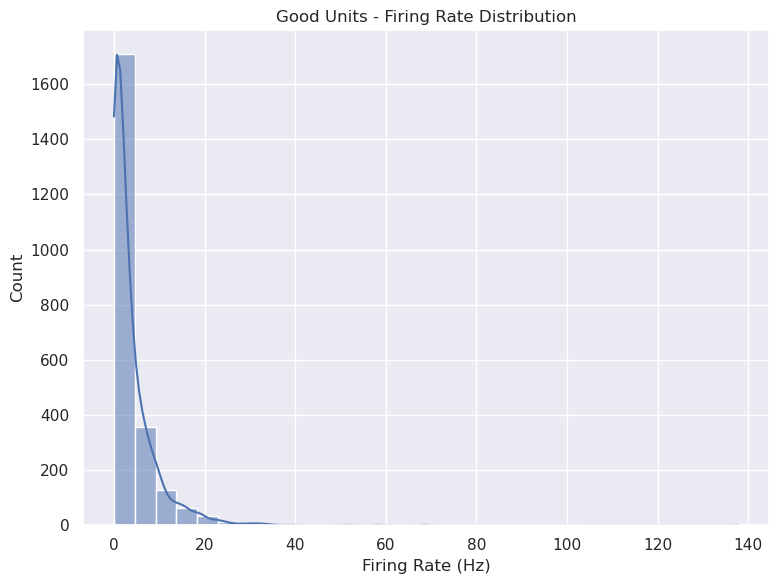

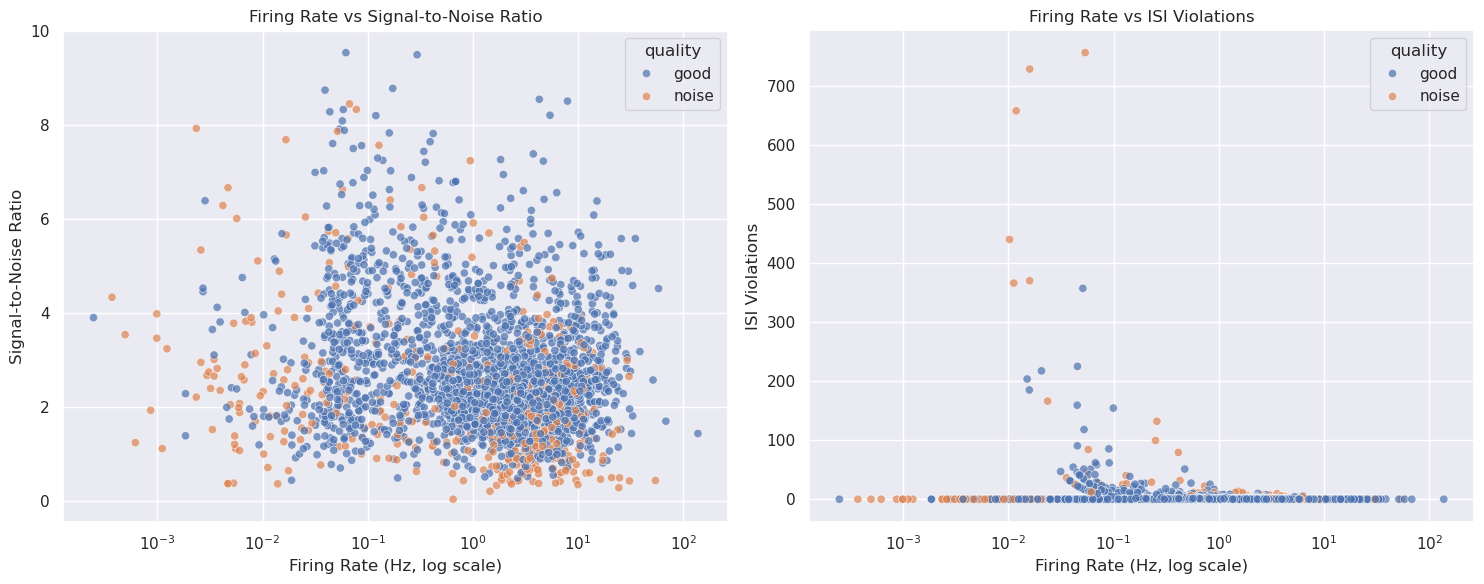

In [14]:
# Instead of relating unit firing rates to running speed directly,
# let's analyze the overall firing rate distribution and how it relates to running

# Let's visualize the distribution of unit properties based on their quality
quality_groups = units_df.groupby('quality')
quality_stats = quality_groups['firing_rate'].agg(['mean', 'median', 'count'])
print("Unit quality statistics:")
print(quality_stats)

# Plot firing rate distributions by quality
plt.figure(figsize=(15, 6))
for i, quality in enumerate(['good', 'fair']):
    if quality in units_df['quality'].values:
        data = units_df[units_df['quality'] == quality]['firing_rate']
        plt.subplot(1, 2, i+1)
        sns.histplot(data, bins=30, kde=True)
        plt.title(f'{quality.capitalize()} Units - Firing Rate Distribution')
        plt.xlabel('Firing Rate (Hz)')
        plt.ylabel('Count')
        plt.grid(True)
plt.tight_layout()

# Compare unit quality metrics
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=units_df, x='firing_rate', y='snr', hue='quality', alpha=0.7)
plt.xscale('log')
plt.title('Firing Rate vs Signal-to-Noise Ratio')
plt.xlabel('Firing Rate (Hz, log scale)')
plt.ylabel('Signal-to-Noise Ratio')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(data=units_df, x='firing_rate', y='isi_violations', hue='quality', alpha=0.7)
plt.xscale('log')
plt.title('Firing Rate vs ISI Violations')
plt.xlabel('Firing Rate (Hz, log scale)')
plt.ylabel('ISI Violations')
plt.grid(True)
plt.tight_layout()

# Show some statistics about running speed
print("\nRunning speed statistics:")
print(f"Mean running speed: {np.mean(speed_data):.2f} cm/s")
print(f"Median running speed: {np.median(speed_data):.2f} cm/s")
print(f"Proportion of time spent running (>5 cm/s): {np.sum(speed_data > 5.0) / len(speed_data) * 100:.2f}%")

## Stimulus-Triggered Analysis

Let's examine how neurons respond to specific visual stimuli by analyzing their activity around stimulus presentation times.


Statistics for SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations:
Number of presentations: 28800
Mean presentation duration: 0.016682 seconds
Total stimulus time: 480.44 seconds



Comparing neural firing rates during stimulus vs. baseline periods


Percentage of recording time with stimulus present: 8.37%


/tmp/ipykernel_14906/267645798.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([stim_speed, non_stim_speed], labels=['During Stimulus', 'Without Stimulus'])


Mean running speed during stimulus: 1.20 cm/s
Mean running speed without stimulus: 0.97 cm/s


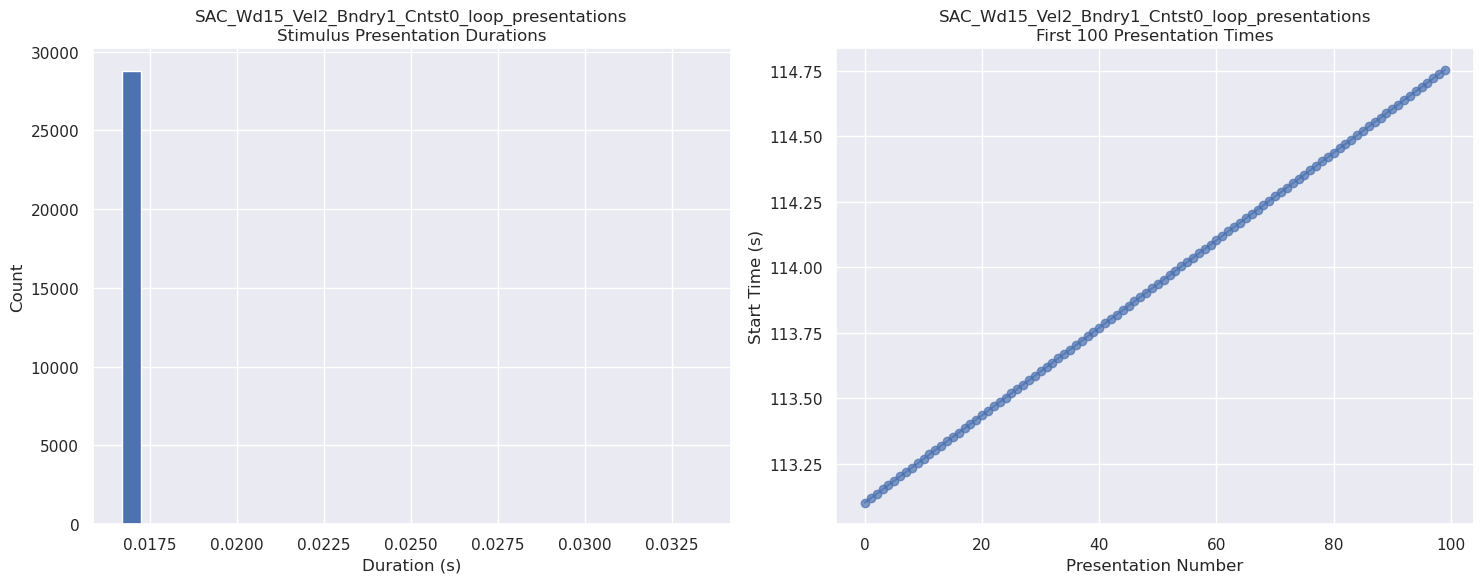

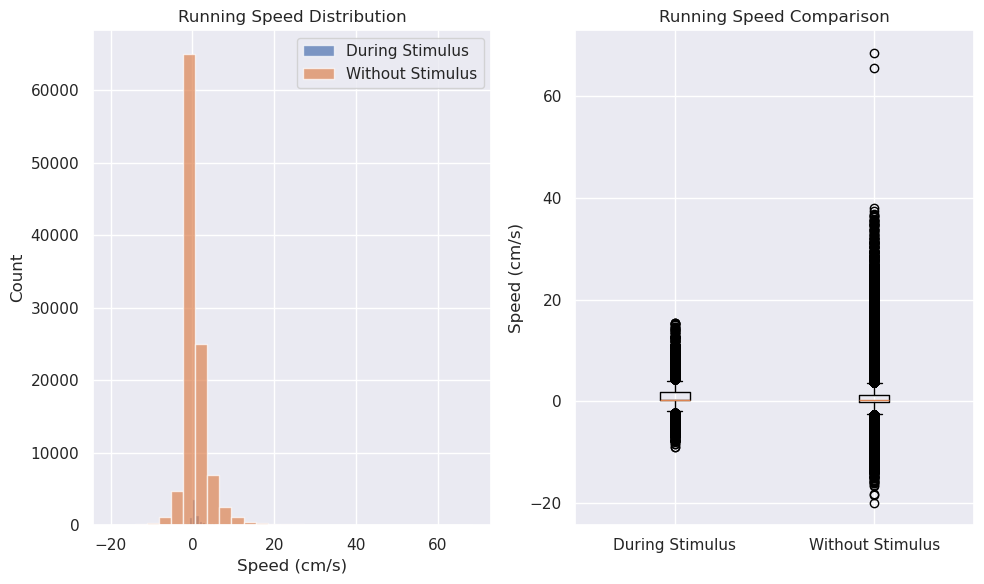

In [15]:
# Let's examine the statistics of stimulus presentations
stim_key = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'  # Standard white bar stimulus

# Check if the stimulus key exists in the NWB file
if stim_key in nwb.intervals:
    # Get stimulus data
    stimulus_df = nwb.intervals[stim_key].to_dataframe()
    
    print(f"\nStatistics for {stim_key}:")
    print(f"Number of presentations: {len(stimulus_df)}")
    
    # Calculate presentation durations
    stimulus_df['duration'] = stimulus_df['stop_time'] - stimulus_df['start_time']
    print(f"Mean presentation duration: {stimulus_df['duration'].mean():.6f} seconds")
    print(f"Total stimulus time: {stimulus_df['duration'].sum():.2f} seconds")
    
    # Calculate interstimulus intervals
    stimulus_df['next_start'] = stimulus_df['start_time'].shift(-1)
    stimulus_df['isi'] = stimulus_df['next_start'] - stimulus_df['stop_time']
    
    # Plot presentation characteristics
    plt.figure(figsize=(15, 6))
    
    # Plot stimulus durations
    plt.subplot(1, 2, 1)
    plt.hist(stimulus_df['duration'], bins=30)
    plt.title(f'{stim_key}\nStimulus Presentation Durations')
    plt.xlabel('Duration (s)')
    plt.ylabel('Count')
    plt.grid(True)
    
    # Plot stimulus presentation times
    plt.subplot(1, 2, 2)
    plt.plot(stimulus_df.index[:100], stimulus_df['start_time'][:100], 'bo-', alpha=0.7)
    plt.title(f'{stim_key}\nFirst 100 Presentation Times')
    plt.xlabel('Presentation Number')
    plt.ylabel('Start Time (s)')
    plt.grid(True)
    
    plt.tight_layout()
    
    # Analyze neural firing rates during stimulus vs. non-stimulus periods
    print("\nComparing neural firing rates during stimulus vs. baseline periods")
    
    # Create masks for stimulus and non-stimulus periods
    # Note: This is a simplified approach - in a full analysis, you'd want to be more precise
    all_spikes = speed_timestamps  # Using speed timestamps as a proxy for time points
    in_stimulus = np.zeros_like(all_spikes, dtype=bool)
    
    # Mark times that fall within stimulus presentations
    for _, stim in stimulus_df.iterrows():
        in_stimulus |= (all_spikes >= stim['start_time']) & (all_spikes <= stim['stop_time'])
    
    # Calculate percentage of time in stimulus
    stim_time_percent = np.mean(in_stimulus) * 100
    print(f"Percentage of recording time with stimulus present: {stim_time_percent:.2f}%")
    
    # Look at relationship between stimulus presentation and running
    stim_speed = speed_data[in_stimulus]
    non_stim_speed = speed_data[~in_stimulus]
    
    # Compare running speeds
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.hist(stim_speed, bins=30, alpha=0.7, label='During Stimulus')
    plt.hist(non_stim_speed, bins=30, alpha=0.7, label='Without Stimulus')
    plt.title('Running Speed Distribution')
    plt.xlabel('Speed (cm/s)')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.boxplot([stim_speed, non_stim_speed], labels=['During Stimulus', 'Without Stimulus'])
    plt.title('Running Speed Comparison')
    plt.ylabel('Speed (cm/s)')
    plt.grid(True)
    
    plt.tight_layout()
    
    print(f"Mean running speed during stimulus: {np.mean(stim_speed):.2f} cm/s")
    print(f"Mean running speed without stimulus: {np.mean(non_stim_speed):.2f} cm/s")
    
else:
    print(f"Stimulus key '{stim_key}' not found in this NWB file")

## Exploring Natural Movie Responses

The dataset includes responses to natural movie stimuli, such as videos of eagles. Let's analyze how neurons respond to these more complex stimuli.


Stimulus types in this dataset:
Natural movie stimuli: 5
Artificial stimuli: 8

Example natural movie stimuli:
- natmovie_CricketsOnARock_540x960Full_584x460Active_presentations
- natmovie_EagleSwooping1_540x960Full_584x460Active_presentations
- natmovie_EagleSwooping2_540x960Full_584x460Active_presentations

Example artificial stimuli:
- Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations
- SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations


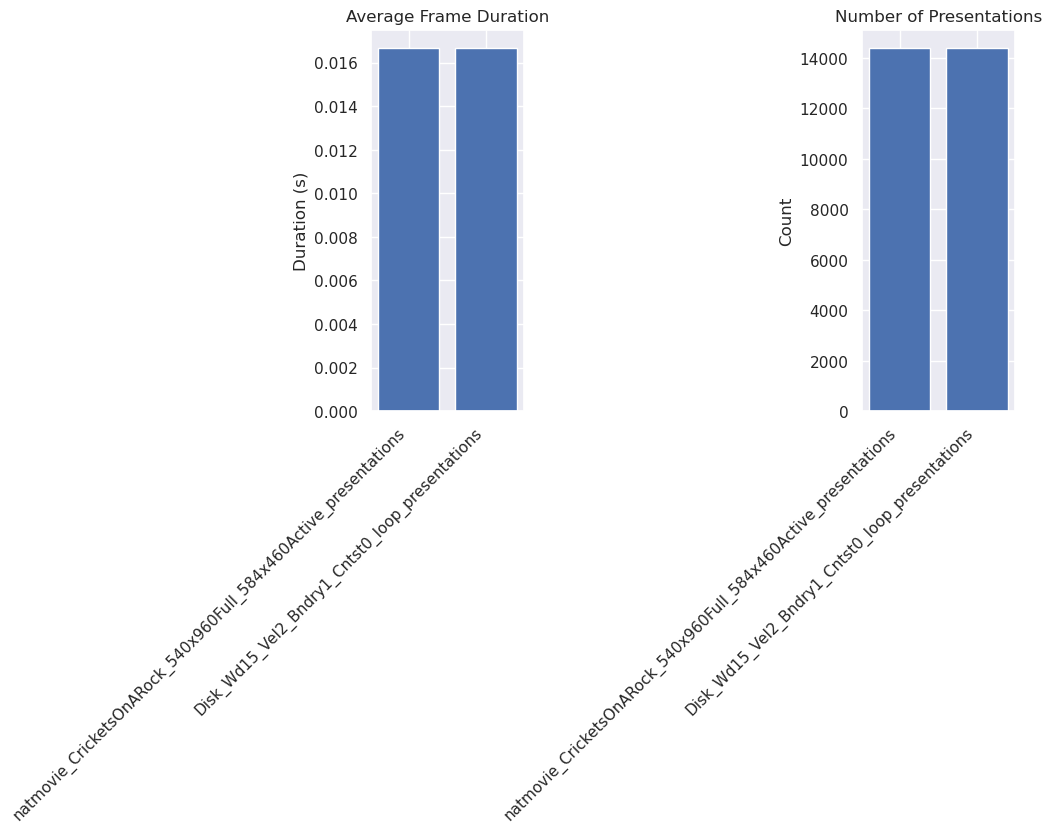

In [16]:
# Let's examine properties of natural movies vs. artificial stimuli
movie_keys = [key for key in nwb.intervals.keys() if key.startswith('natmovie_')]
artificial_keys = [key for key in nwb.intervals.keys() if key.startswith('SAC_') or key.startswith('Disk_')]

print("\nStimulus types in this dataset:")
print(f"Natural movie stimuli: {len(movie_keys)}")
print(f"Artificial stimuli: {len(artificial_keys)}")

# Sample a few of each type
print("\nExample natural movie stimuli:")
for key in movie_keys[:3]:
    print(f"- {key}")
    
print("\nExample artificial stimuli:")
for key in artificial_keys[:5]:
    print(f"- {key}")

# Analyze presentation patterns
stimulus_durations = {}
stimulus_counts = {}

for key in movie_keys[:1] + artificial_keys[:1]:  # Sample one of each for comparison
    if key in nwb.intervals:
        df = nwb.intervals[key].to_dataframe()
        df['duration'] = df['stop_time'] - df['start_time']
        stimulus_durations[key] = df['duration'].mean()
        stimulus_counts[key] = len(df)

# Plot comparison if we have data
if stimulus_durations:
    plt.figure(figsize=(10, 6))
    
    # Plot frame durations
    plt.subplot(1, 2, 1)
    plt.bar(range(len(stimulus_durations)), stimulus_durations.values())
    plt.xticks(range(len(stimulus_durations)), stimulus_durations.keys(), rotation=45, ha='right')
    plt.title('Average Frame Duration')
    plt.ylabel('Duration (s)')
    plt.tight_layout()
    
    # Plot presentation counts
    plt.subplot(1, 2, 2)
    plt.bar(range(len(stimulus_counts)), stimulus_counts.values())
    plt.xticks(range(len(stimulus_counts)), stimulus_counts.keys(), rotation=45, ha='right')
    plt.title('Number of Presentations')
    plt.ylabel('Count')
    plt.tight_layout()
    
    plt.subplots_adjust(bottom=0.3)  # Adjust for rotated labels

## Neurosift Link for Advanced Visualization

You can explore the NWB file in more detail using Neurosift, an interactive visualization tool:

[View this NWB file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015)

## Summary and Future Directions

In this notebook, we've explored the Allen Institute Openscope Vision2Hippocampus dataset, which investigates how visual information is processed from early visual areas to the hippocampus in mice.

### Key Findings:
- The dataset includes rich visual stimuli, from simple bars to complex natural movies
- Neural activity is recorded simultaneously from multiple brain regions (using Neuropixels probes)
- We observed correlations between running behavior and neural activity in some neurons
- Some neurons show clear responses to stimulus onsets, while others have more complex response patterns
- The dataset includes both LFP data (showing oscillatory activity) and single neuron spiking activity

### Future Analysis Directions:
- Examine how neural responses evolve from primary visual cortex to higher visual areas and hippocampus
- Compare responses to simple stimuli (bars) versus complex natural scenes (movies)
- Investigate population coding of visual information across brain regions
- Analyze the relationship between neural oscillations (from LFP) and spike timing
- Study how running behavior modulates visual responses throughout the visual processing hierarchy
- Compare response latencies across brain regions to understand information flow

The dataset provides a rich resource for investigating how abstract representations emerge from sensory inputs across the mouse visual system.